In [1]:
import dill
import pandas as pd
from tqdm import tqdm
import sys
import pyLDAvis.sklearn
import matplotlib.pyplot

import warnings
warnings.filterwarnings('ignore')

sys.path.append('../scripts')

import twitter
import text_analysis

#Look at topics related to #yanggang, #basicincome, and #ai
basicincome_tweets = dill.load(open('../scrapped_data/twitter-data/basicincome_tweets.pkd', 'rb'))
universalbasicincome_tweets = dill.load(open('../scrapped_data/twitter-data/universalbasicincome_tweets.pkd', 'rb'))
yanggang_tweets = dill.load(open('../scrapped_data/twitter-data/yang_gang_tweets', 'rb'))
ai_tweets = dill.load(open('../scrapped_data/twitter-data/ai_tweets.pkd', 'rb'))

# Look at topics related to Trump, Fake News, and Political Correctness
trump_tweets = dill.load(open('../scrapped_data/twitter-data/trump_tweets.pkd', 'rb'))
fakenews_tweets = dill.load(open('../scrapped_data/twitter-data/fakenews_tweets.pkd', 'rb'))
politicalcorrectness_tweets = dill.load(open('../scrapped_data/twitter-data/politicalcorrectness_tweets.pkd', 'rb'))

# Bernie Tweets
berniebros_tweets = dill.load(open('../scrapped_data/twitter-data/berniebros_tweets.pkd', 'rb'))

# Some Initial EDA

So let us do some initial exploratory data analysis. First, let us check what our common hashtags, and the platform they are coming from.

## Twitter Popularity
Now, let us do a plot of our contestents Twitter activity. I will be measuring two quantitents

1. Retweet count,
2. favorite count.

This will give a proxy for each one's popularity.

### Andrew Yang

In [2]:
andrew_yang_tweets = dill.load(open('../scrapped_data/twitter-data/yang-tweets.pkd', 'rb'))

In [22]:
df = pd.DataFrame({'date': [tweet.created_at for tweet in andrew_yang_tweets],
                   'retweets': [tweet.retweet_count for tweet in andrew_yang_tweets],
                   'likes': [tweet.favorite_count for tweet in andrew_yang_tweets]})

In [29]:
type(ax)

numpy.ndarray

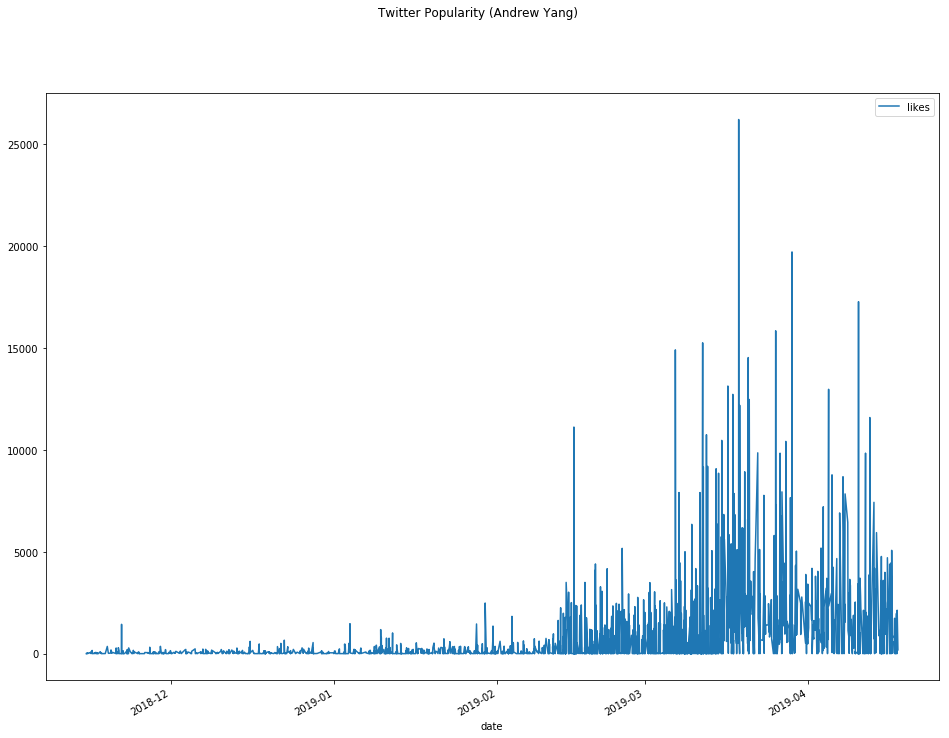

In [30]:
ax = df.plot(
    x='date',
    y='likes',
    subplots=True,
    figsize=(16, 12),
    title='Twitter Popularity (Andrew Yang)',
)

### Bernie Sanders

In [31]:
bernie_sanders_tweets = dill.load(open('../scrapped_data/twitter-data/sanders-tweets.pkd', 'rb'))

In [32]:
df = pd.DataFrame({'date': [tweet.created_at for tweet in bernie_sanders_tweets],
                   'retweets': [tweet.retweet_count for tweet in bernie_sanders_tweets],
                   'likes': [tweet.favorite_count for tweet in bernie_sanders_tweets]})

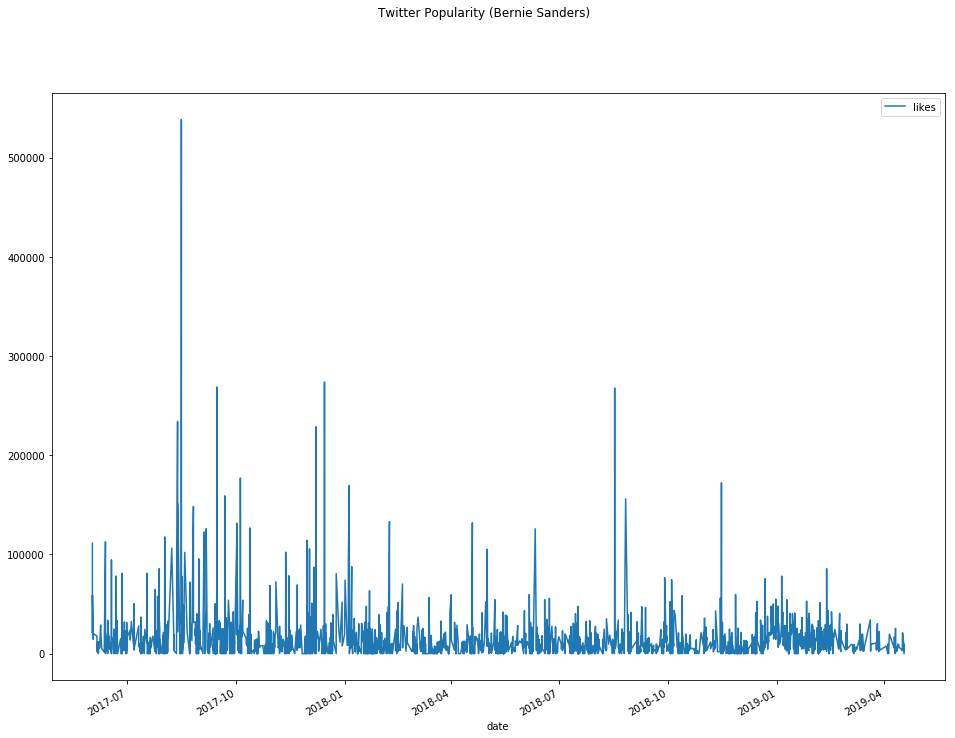

In [33]:
ax = df.plot(
    x='date',
    y='likes',
    subplots=True,
    figsize=(16, 12),
    title='Twitter Popularity (Bernie Sanders)',
)

### Donald Trump

In [34]:
donald_trump_tweets = dill.load(open('../scrapped_data/twitter-data/trump_personal_tweets.pkd', 'rb'))

In [37]:
df = pd.DataFrame({'date': [tweet.created_at for tweet in donald_trump_tweets],
                   'retweets': [tweet.retweet_count for tweet in donald_trump_tweets],
                   'likes': [tweet.favorite_count for tweet in donald_trump_tweets]})

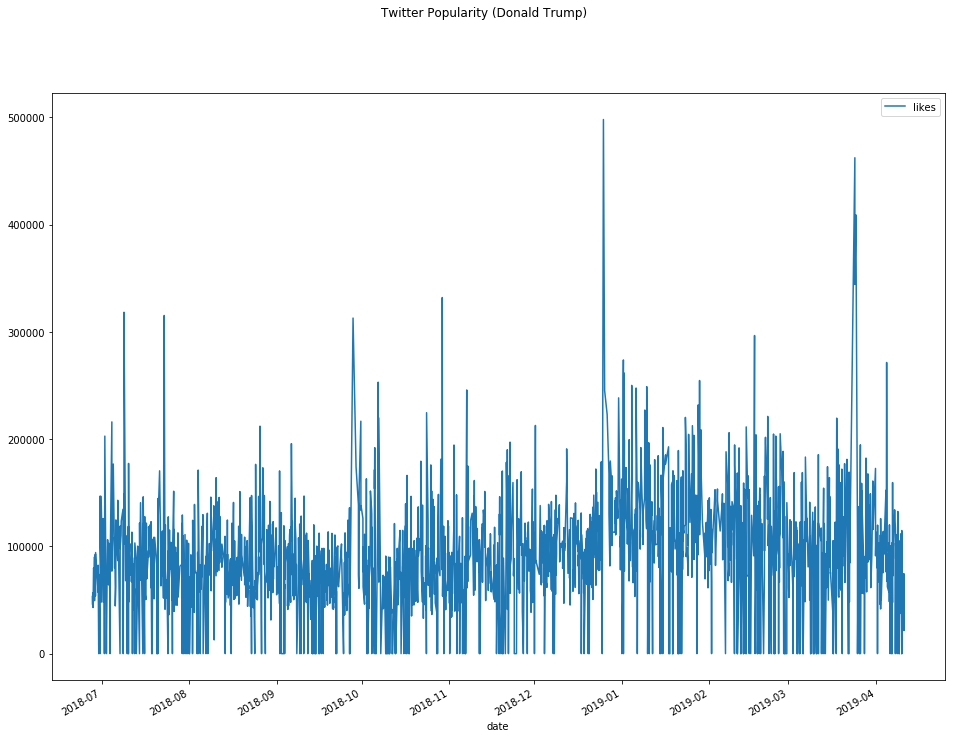

In [38]:
ax = df.plot(
    x='date',
    y='likes',
    subplots=True,
    figsize=(16, 12),
    title='Twitter Popularity (Donald Trump)',
)

## Word Clouds

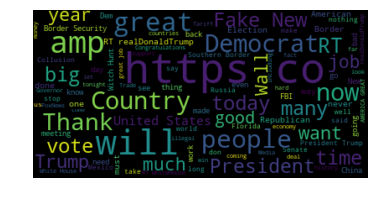

In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=50, max_words=100).generate(' '.join([tweet.full_text for tweet in donald_trump_tweets]))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

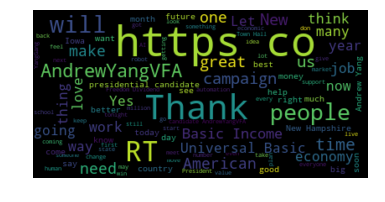

In [14]:
wordcloud = WordCloud(max_font_size=50, max_words=100).generate(' '.join([tweet.full_text for tweet in andrew_yang_tweets]))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

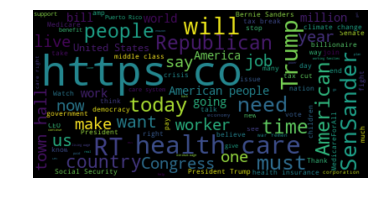

In [15]:
wordcloud = WordCloud(max_font_size=50, max_words=100).generate(' '.join([tweet.full_text for tweet in bernie_sanders_tweets]))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Topic Analysis

Next, I gathered Twitter data related to several popular hashtags. The hashtags I chose as relavent are mostly pertinent to issues each campaigner brings up. They are as follows.

1. Andrew Yang
    * #universalbasicincome,
    * #yanggang
    

2. Bernie Sanders
    * #berniebros
    

3. Donald Trump
    * #fakenews,
    * #politicalcorrectness
    * #trump
    
I used [ritetag](https://ritetag.com) to determine some of the hashtags I should be paying attention to. Note at the moment that issues Bernie Sanders is concerned with do not have nice simple hashtags that pop up. This makes EDA somewhat difficult in this case.

First, let's do a basic plot of what kind of people these tweets are coming from.

In [16]:
sources = ['Twitter for Android', 'Twitter for iPhone', 'Twitter for iPad', 'Twitter Web Client']

basic = pd.DataFrame({'source': ['Andoid', 'iPhone', 'iPad', 'Web Client'],
                      'basicincome': [[tweet.source for tweet in basicincome_tweets].count(s) for s in sources],
                      'yanggang': [[tweet.source for tweet in yanggang_tweets].count(s) for s in sources],
                      'trump': [[tweet.source for tweet in trump_tweets].count(s) for s in sources],
                      'fakenews': [[tweet.source for tweet in fakenews_tweets].count(s) for s in sources],
                      'politicalcorrectness': [[tweet.source for tweet in politicalcorrectness_tweets].count(s) for s in sources]})

[Text(0, 0, 'Andoid'),
 Text(0, 0, 'iPhone'),
 Text(0, 0, 'iPad'),
 Text(0, 0, 'Web Client')]

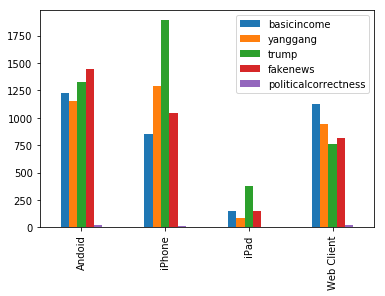

In [17]:
import matplotlib.pyplot

ax = basic.plot(kind='bar')
ax.set_xticklabels(['Andoid', 'iPhone', 'iPad', 'Web Client'])

There isn't any probably any series connection. We could do a $\chi^2$-test to confirm this. The one exception would be is that "Trump" gathers a lot of iPhone users. This could be because Donald Trump, being known as a iPhone user, tweets a lot. Or it could be something inherent about iPhone users. I'm just asking questions here.

Second, why not more love for the iPad?

## Andrew Yang

### Basic Income

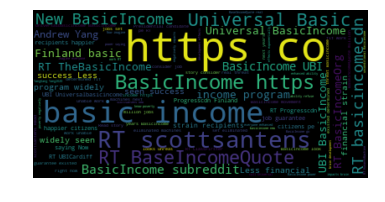

In [18]:
text = twitter.Tweets(basicincome_tweets)

wordcloud = WordCloud(max_font_size=50, max_words=100).generate(' '.join([tweet.full_text for tweet in basicincome_tweets]))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
text = twitter.Tweets(basicincome_tweets)

text.process_tweets_into_df()
text.clean_column()
text.generate_lda_graph()

100%|██████████| 4377/4377 [00:01<00:00, 3326.57it/s]


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      195.414795  322.302490       1        1  14.960270
9     -182.011612 -317.713196       2        1  14.222865
3      499.638794  127.720024       3        1  11.085246
5      148.877914  -82.102119       4        1  10.919092
8      467.320679 -271.191681       5        1   9.585447
1     -455.498871  272.964783       6        1   9.203649
0     -135.916443   85.797699       7        1   8.898161
2     -122.114273  494.307037       8        1   7.384574
7     -487.248657 -125.741211       9        1   7.376216
6      133.727997 -491.873596      10        1   6.364479, topic_info=     Category         Freq                  Term        Total  loglift  \
term                                                                     
1427  Default   309.000000                   job   309.000000  30.0000   
1309  Default  1044.000000                income  1044.000000  29.0000   
282   Default   939.000000                 basic   939.000000  28.0000   
2014  Default   291.000000               poverty   291.000000  27.0000   
2847  Default   358.000000                  work   358.000000  26.0000   
1933  Default   419.000000                people   419.000000  25.0000   
2309  Default   655.000000          scottsantens   655.000000  24.0000   
2723  Default   468.000000             universal   468.000000  23.0000   
179   Default   289.000000            andrewyang   289.000000  22.0000   
2692  Default   723.000000                   ubi   723.000000  21.0000   
1748  Default   186.000000                 money   186.000000  20.0000   
538   Default   160.000000                  come   160.000000  19.0000   
257   Default   185.000000            automation   185.000000  18.0000   
2061  Default   203.000000               program   203.000000  17.0000   
291   Default   213.000000        basicincomecdn   213.000000  16.0000   
2885  Default   184.000000                  year   184.000000  15.0000   
1801  Default   367.000000                   new   367.000000  14.0000   
1482  Default   206.000000                  know   206.000000  13.0000   
171   Default   177.000000                   amp   177.000000  12.0000   
281   Default   311.000000       baseincomequote   311.000000  11.0000   
2234  Default   144.000000                 right   144.000000  10.0000   
1805  Default   186.000000                  news   186.000000   9.0000   
1007  Default   161.000000               finland   161.000000   8.0000   
2132  Default   111.000000                  read   111.000000   7.0000   
2561  Default   185.000000                   tax   185.000000   6.0000   
1188  Default   155.000000                 happy   155.000000   5.0000   
2725  Default   171.000000  universalbasicincome   171.000000   4.0000   
2461  Default   133.000000                 start   133.000000   3.0000   
1313  Default   131.000000              increase   131.000000   2.0000   
1923  Default   183.000000                   pay   183.000000   1.0000   
...       ...          ...                   ...          ...      ...   
2574  Topic10    32.049513                  team    32.905405   2.7281   
2672  Topic10    27.985243              trillion    28.841087   2.7243   
1866  Topic10    26.112683                  open    26.968594   2.7222   
1562  Topic10    26.032078                listen    26.887916   2.7221   
2532  Topic10    25.752374                  sure    26.608630   2.7217   
471   Topic10    25.111151                 check    25.967193   2.7209   
738   Topic10    24.527819            difference    25.390015   2.7199   
138   Topic10    24.285693                   age    25.141699   2.7198   
2689  Topic10    23.811261                  type    24.670375   2.7190   
1224  Topic10    19.845860             highlight    20.701833   2.7122   
1020  Topic10    18.866780                    fo    19.722733   2.7101   
220  

In this case, I am using this hashtag as a proxy for Universal Basic Income. There are a few things of concern here. Andrew Yang is commonly associated with this movement. Finland also of heavy interest at the moment. This is possibly due to an experimental A/B test Findland ran in 2017-2018 to study the effects of UBI, which [we still don't fully know the data on how that turned out](https://medium.com/basic-income/what-is-there-to-learn-from-finlands-basic-income-experiment-did-it-succeed-or-fail-54b8e5051f60). Also note that there is a lot of concern about the future of artificial intelligence and AI.

### Yang Gang

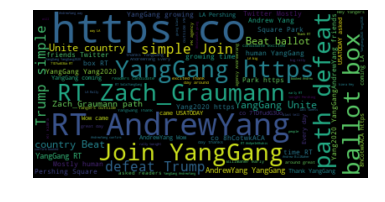

In [20]:
text = twitter.Tweets(yanggang_tweets)

wordcloud = WordCloud(max_font_size=50, max_words=100).generate(' '.join([tweet.full_text for tweet in yanggang_tweets]))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
df = text.process_tweets_into_df()

text = twitter.Tweets(yanggang_tweets)

text.process_tweets_into_df()
text.clean_column()
text.generate_lda_graph()

100%|██████████| 3909/3909 [00:01<00:00, 3086.90it/s]


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1     -67.670853  21.106735       1        1  16.403685
5      34.259201  -2.248155       2        1  14.911791
2     -55.738178  68.621399       3        1  12.411293
3      34.432644  49.557117       4        1  11.557317
0      -2.176290 -28.761980       5        1  11.376581
8     -29.143484  40.775028       6        1   9.886540
9      -4.586140  73.163612       7        1   7.534943
7       4.896642  23.903826       8        1   6.031325
6     -26.690659   2.900961       9        1   5.306951
4     -53.731010 -24.645168      10        1   4.579572, topic_info=     Category         Freq            Term        Total  loglift  logprob
term                                                                     
1786  Default   449.000000           trump   449.000000  30.0000  30.0000
130   Default  1938.000000      andrewyang  1938.000000  29.0000  29.0000
1986  Default   418.000000   zach_graumann   418.000000  28.0000  28.0000
1933  Default   361.000000            yang   361.000000  27.0000  27.0000
958   Default   410.000000            join   410.000000  26.0000  26.0000
421   Default   405.000000         country   405.000000  25.0000  25.0000
195   Default   399.000000            beat   399.000000  24.0000  24.0000
26    Default   578.000000            2020   578.000000  23.0000  23.0000
1291  Default   395.000000            path   395.000000  22.0000  22.0000
1575  Default   392.000000          simple   392.000000  21.0000  21.0000
1819  Default   389.000000           unite   389.000000  20.0000  20.0000
182   Default   388.000000          ballot   388.000000  19.0000  19.0000
247   Default   388.000000             box   388.000000  18.0000  18.0000
480   Default   384.000000          defeat   384.000000  17.0000  17.0000
1745  Default   325.000000            time   325.000000  16.0000  16.0000
1936  Default   698.000000        yang2020   698.000000  15.0000  15.0000
295   Default   306.000000       candidate   306.000000  14.0000  14.0000
467   Default   272.000000             day   272.000000  13.0000  13.0000
1712  Default   438.000000           thank   438.000000  12.0000  12.0000
855   Default   250.000000   humanityfirst   250.000000  11.0000  11.0000
1301  Default   248.000000        pershing   248.000000  10.0000  10.0000
849   Default   234.000000           human   234.000000   9.0000   9.0000
719   Default   227.000000          friend   227.000000   8.0000   8.0000
778   Default   223.000000            grow   223.000000   7.0000   7.0000
1809  Default   220.000000         twitter   220.000000   6.0000   6.0000
128   Default   307.000000          andrew   307.000000   5.0000   5.0000
36    Default   208.000000             250   208.000000   4.0000   4.0000
0     Default   246.000000             000   246.000000   3.0000   3.0000
372   Default   312.000000            come   312.000000   2.0000   2.0000
1035  Default   150.000000            like   150.000000   1.0000   1.0000
...       ...          ...             ...          ...      ...      ...
1978  Topic10    28.566256        ygang311    29.411952   3.0544  -4.1423
794   Topic10    28.439485           happy    29.285170   3.0543  -4.1468
168   Topic10    25.669713       available    26.515373   3.0512  -4.2492
1971  Topic10    24.051165     yangtrainco    24.896828   3.0490  -4.3144
1304  Topic10    23.825555             pet    24.671215   3.0487  -4.3238
184   Topic10    23.825555        bandanas    24.671216   3.0487  -4.3238
268   Topic10    22.384918         bts_twt    23.230686   3.0465  -4.3862
267   Topic10    20.372936             bts    21.218703   3.0429  -4.4803
428   Topic10    18.008738            crao    18.854405   3.0377  -4.6037
1728  Topic10    16.251821         theview    17.097466   3.0328  -4.7063
270   Topic10    15.689439           build    16.535197   3.0311  -4.7416
1488  Topic10    14.710063   

A few things of note here. First, Zach Graumann gets mentioned a lot, especially in the first topic. He works as a campaign manager for Andrew Yang. He is also often compared to Trump, which makes sense as if he wins the nomination, he will be Trump's main competitor.

## Bernie Sanders

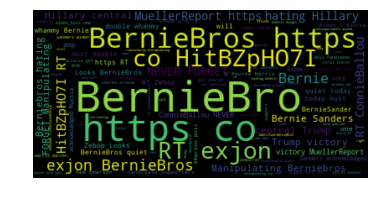

In [24]:
text = twitter.Tweets(berniebros_tweets)

wordcloud = WordCloud(max_font_size=50, max_words=100).generate(' '.join([tweet.full_text for tweet in berniebros_tweets]))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
df = text.process_tweets_into_df()

text = twitter.Tweets(berniebros_tweets)

text.process_tweets_into_df()
text.clean_column()
text.generate_lda_graph()

100%|██████████| 2635/2635 [00:01<00:00, 1950.76it/s]


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0       87.447777   27.587294       1        1  25.958922
8      -20.151299  169.395554       2        1  11.925358
5      106.412300  141.317337       3        1  10.855052
3      126.761139  -93.573997       4        1   9.034981
2     -105.800713  -59.669647       5        1   8.932565
9     -129.289215   68.487213       6        1   7.786782
1      -17.472136   56.769886       7        1   7.357742
4        3.342278 -158.906281       8        1   7.238646
6        9.810270  -48.671463       9        1   6.901352
7      198.023254   24.777672      10        1   4.008602, topic_info=     Category         Freq             Term        Total  loglift  logprob
term                                                                      
1927  Default  1071.000000               rt  1071.000000  30.0000  30.0000
266   Default  2080.000000       berniebros  2080.000000  29.0000  29.0000
2311  Default   354.000000            trump   354.000000  28.0000  28.0000
1059  Default   246.000000          hillary   246.000000  27.0000  27.0000
820   Default   187.000000            exjon   187.000000  26.0000  26.0000
1031  Default   166.000000             hate   166.000000  25.0000  25.0000
126   Default   258.000000              amp   258.000000  24.0000  24.0000
259   Default   659.000000           bernie   659.000000  23.0000  23.0000
907   Default   145.000000           forget   145.000000  22.0000  22.0000
499   Default   141.000000     connieballou   141.000000  21.0000  21.0000
1483  Default   141.000000    muellerreport   141.000000  20.0000  20.0000
2396  Default   139.000000          victory   139.000000  19.0000  19.0000
411   Default   138.000000          central   138.000000  18.0000  18.0000
1371  Default   138.000000     manipulating   138.000000  17.0000  17.0000
1954  Default   271.000000          sanders   271.000000  16.0000  16.0000
1306  Default   348.000000             like   348.000000  15.0000  15.0000
2167  Default   193.000000        supporter   193.000000  14.0000  14.0000
2530  Default   113.000000            zebop   113.000000  13.0000  13.0000
2374  Default   100.000000              use   100.000000  12.0000  12.0000
2436  Default   132.000000           warren   132.000000  11.0000  11.0000
1332  Default   106.000000            looks   106.000000  10.0000  10.0000
288   Default   104.000000            biden   104.000000   9.0000   9.0000
2413  Default   256.000000             vote   256.000000   8.0000   8.0000
389   Default   173.000000        candidate   173.000000   7.0000   7.0000
1524  Default    98.000000              new    98.000000   6.0000   6.0000
1696  Default    93.000000             poll    93.000000   5.0000   5.0000
1686  Default    88.000000              poc    88.000000   4.0000   4.0000
904   Default    86.000000           forbes    86.000000   3.0000   3.0000
2247  Default   157.000000            think   157.000000   2.0000   2.0000
1934  Default    95.000000           russia    95.000000   1.0000   1.0000
...       ...          ...              ...          ...      ...      ...
810   Topic10    20.192462      eviscerates    21.014193   3.1768  -4.0364
1752  Topic10    20.192418     proclamation    21.014191   3.1768  -4.0364
276   Topic10    19.352637      berniesande    20.174251   3.1751  -4.0788
1022  Topic10    17.342493             hard    18.164741   3.1704  -4.1885
186   Topic10    15.280735         assholes    16.102176   3.1644  -4.3151
256   Topic10    14.339359          bernard    15.163288   3.1609  -4.3787
1246  Topic10    14.073061             kind    14.894616   3.1600  -4.3974
299   Topic10    12.143566            blame    12.965423   3.1512  -4.5449
2115  Topic10    12.133533               st    12.954976   3.1512  -4.5457
2113  Topic10    10.427077            squad    11.249434   3.1408  -4.6973
1305  Topic10     7.972226         l

## Donald Trump

### Trump

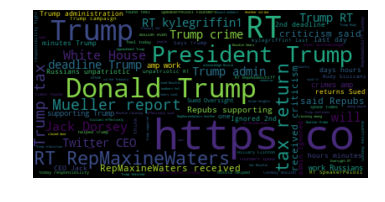

In [26]:
wordcloud = WordCloud(max_font_size=50, max_words=100).generate(' '.join([tweet.full_text for tweet in trump_tweets]))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
df = text.process_tweets_into_df()

text = twitter.Tweets(trump_tweets)

text.process_tweets_into_df()
text.clean_column()
text.generate_lda_graph()

100%|██████████| 5048/5048 [00:02<00:00, 2031.89it/s]


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1       -7.328857 -319.996124       1        1  13.453494
3      103.608139   70.646225       2        1  13.426785
5      323.156708  -17.433323       3        1  12.846369
7     -244.713852   85.642708       4        1  10.969536
8      -71.860779  -39.316418       5        1  10.111467
9      -45.548332  233.910263       6        1   9.367774
6      270.070496 -273.325562       7        1   9.036796
0      235.112091  234.154572       8        1   8.775855
2     -218.863876 -195.246628       9        1   6.440012
4      110.738411 -136.065765      10        1   5.571913, topic_info=     Category         Freq             Term        Total  loglift  logprob
term                                                                      
3430  Default   365.000000          twitter   365.000000  30.0000  30.0000
1740  Default   286.000000             jack   286.000000  29.0000  29.0000
3262  Default   228.000000              tax   228.000000  28.0000  28.0000
2078  Default   243.000000             meet   243.000000  27.0000  27.0000
2768  Default   248.000000  repmaxinewaters   248.000000  26.0000  26.0000
2812  Default   209.000000           return   209.000000  25.0000  25.0000
2892  Default   240.000000          russian   240.000000  24.0000  24.0000
1566  Default   226.000000            house   226.000000  23.0000  23.0000
192   Default   420.000000              amp   420.000000  22.0000  22.0000
3346  Default   229.000000             time   229.000000  21.0000  21.0000
2188  Default   360.000000          mueller   360.000000  20.0000  20.0000
2769  Default   258.000000           report   258.000000  19.0000  19.0000
1629  Default   318.000000      impeachment   318.000000  18.0000  18.0000
880   Default   154.000000         deadline   154.000000  17.0000  17.0000
132   Default   168.000000   administration   168.000000  16.0000  16.0000
3606  Default   153.000000            white   153.000000  15.0000  15.0000
3564  Default   160.000000             want   160.000000  14.0000  14.0000
2552  Default   490.000000        president   490.000000  13.0000  13.0000
3352  Default   262.000000            today   262.000000  12.0000  12.0000
3640  Default   175.000000             work   175.000000  11.0000  11.0000
3409  Default  4090.000000            trump  4090.000000  10.0000  10.0000
1421  Default   145.000000              gop   145.000000   9.0000   9.0000
1042  Default   403.000000           donald   403.000000   8.0000   8.0000
871   Default   196.000000              day   196.000000   7.0000   7.0000
1565  Default   141.000000             hour   141.000000   6.0000   6.0000
1053  Default   138.000000           dorsey   138.000000   5.0000   5.0000
3215  Default   256.000000          support   256.000000   4.0000   4.0000
567   Default   129.000000              ceo   129.000000   3.0000   3.0000
1873  Default   120.000000     kylegriffin1   120.000000   2.0000   2.0000
812   Default   196.000000            crime   196.000000   1.0000   1.0000
...       ...          ...              ...          ...      ...      ...
1140  Topic10    16.284641        encourage    17.132564   2.8367  -5.2877
2831  Topic10    16.076670             rich    16.924409   2.8360  -5.3006
3001  Topic10    15.922838              sex    16.772397   2.8355  -5.3102
735   Topic10    15.601101     constitution    16.448903   2.8345  -5.3306
9     Topic10    14.974572               14    15.822467   2.8324  -5.3716
2691  Topic10    14.599906          realize    15.447690   2.8310  -5.3970
3185  Topic10    14.341495           strong    15.189251   2.8300  -5.4148
943   Topic10    14.300166             deny    15.148000   2.8298  -5.4177
3313  Topic10    14.203884          theresa    15.051677   2.8295  -5.4245
3287  Topic10    14.140607          testify    14.988438   2.8292  -5.4289
2668  Topic10    14.130318          

There is a lot to say here. First, these are mostly just concerns. The first topic is on Russia and Twitter, the eigth is about Trump's tax returns, and words like 'impeachment' and 'crime' are associated with multiple topics.

### Fake News

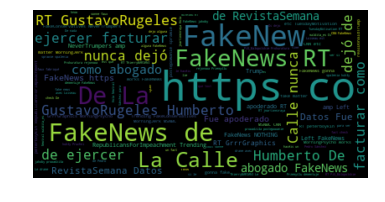

In [28]:
wordcloud = WordCloud(max_font_size=50, max_words=100).generate(' '.join([tweet.full_text for tweet in fakenews_tweets]))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df = text.process_tweets_into_df()

text = twitter.Tweets(berniebros_tweets)

text.process_tweets_into_df()
text.clean_column()
text.generate_lda_graph()

In [ ]:
text = twitter.Tweets(fakenews_tweets)
df = text.process_tweets_into_df()

tqdm.pandas()
df["processed_text"] = df["full_text"].progress_apply(text_analysis.spacy_tokenizer)

tf, tf_vectorizer, tfidf, tfidf_vectorizer = text_analysis.get_words(df.processed_text.dropna().values)
lda, nmf = text_analysis.get_topics(tf, tfidf, n_components=10)
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer, mds='tsne')
dash

### Political Correctness

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100).generate(' '.join([tweet.full_text for tweet in politicalcorrectness_tweets]))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
text = twitter.Tweets(politicalcorrectness_tweets)
df = text.process_tweets_into_df()

tqdm.pandas()
df["processed_text"] = df["full_text"].progress_apply(text_analysis.spacy_tokenizer)

tf, tf_vectorizer, tfidf, tfidf_vectorizer = text_analysis.get_words(df.processed_text.dropna().values)
lda, nmf = text_analysis.get_topics(tf, tfidf, n_components=10)
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer, mds='tsne')
dash